## Chapter8.2 畳み込み層

In [1]:
# パッケージの読み込み
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# MNISTデータセットの読み込み
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/")

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz


(-0.5, 27.5, 27.5, -0.5)

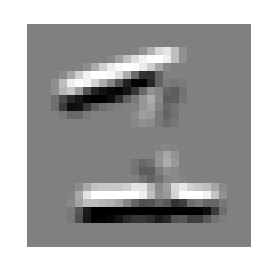

In [3]:
# ラベル1の入力画像 28x28配列 
img_in = mnist.test.images[3906].reshape(28, 28)

# 3x3フィルタ
filt = [[-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]]

# 画像にフィルタを適用
def apply_filter(img, filt):
    # 全て0の28x28配列
    img_out = np.zeros((28, 28))
    # 注目する画素を左上から順に走査
    for y in range(1, 27):
        for x in range(1, 27):
            # 座標(x, y)の周辺3x3領域
            im = img[y - 1:y + 2, x - 1:x + 2]
            # フィルタ処理結果をimg_outに格納
            img_out[y, x] = np.multiply(filt, im).sum()
    return img_out

img = apply_filter(img_in, filt)

# 結果を描画
plt.gray()
plt.matshow(img)
plt.axis('off')

TensorFlowでフィルタ係数の掛け算

In [4]:
with tf.Graph().as_default():
    x = tf.constant([[1, 2, 3],
                     [4, 5, 6],
                     [7, 8, 9]], shape=[1, 9])

    w = tf.constant([[-1, -2, -1],
                     [0, 0, 0],
                     [1, 2, 1]], shape=[9, 1])

    op = tf.matmul(x, w)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        result = sess.run(op)
print(result)  # -> [[24]]

[[24]]
